### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.15.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, 10)
testY = tf.keras.utils.to_categorical(testY, 10)

In [7]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

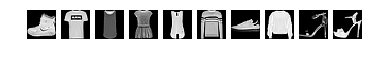

label for each of the above image:
(9, 0, 0, 3, 0, 2, 7, 2, 5, 5)


In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig, (plt0, plt1, plt2, plt3, plt4, plt5, plt6, plt7, plt8, plt9) = plt.subplots(1, 10)
plt0.imshow(trainX[0,:,:], cmap='gray')
plt0.axis('off')
plt1.imshow(trainX[1,:,:], cmap='gray')
plt1.axis('off')
plt2.imshow(trainX[2,:,:], cmap='gray')
plt2.axis('off')
plt3.imshow(trainX[3,:,:], cmap='gray')
plt3.axis('off')
plt4.imshow(trainX[4,:,:], cmap='gray')
plt4.axis('off')
plt5.imshow(trainX[5,:,:], cmap='gray')
plt5.axis('off')
plt6.imshow(trainX[6,:,:], cmap='gray')
plt6.axis('off')
plt7.imshow(trainX[7,:,:], cmap='gray')
plt7.axis('off')
plt8.imshow(trainX[8,:,:], cmap='gray')
plt8.axis('off')
plt9.imshow(trainX[9,:,:], cmap='gray')
plt9.axis('off')
plt.show()
print("label for each of the above image:")
print(np.argmax(trainY[0]), np.argmax(trainY[1]), np.argmax(trainY[2]), np.argmax(trainY[3]), np.argmax(trainY[4]), np.argmax(trainY[5]), np.argmax(trainY[6]), np.argmax(trainY[7]), np.argmax(trainY[8]), np.argmax(trainY[9]))

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((trainX.shape[1] * trainX.shape[2], ), input_shape=(trainX.shape[1], trainX.shape[2],)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

W1229 09:04:03.634198 140307137148800 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling __init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Execute the model using model.fit()

In [11]:
model.fit(trainX, trainY, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 2075.1803 - acc: 0.7404
Epoch 2/10
60000/60000 [==============================] - 3s 58us/sample - loss: 1672.4439 - acc: 0.7783
Epoch 3/10
60000/60000 [==============================] - 4s 59us/sample - loss: 1543.2692 - acc: 0.7858
Epoch 4/10
60000/60000 [==============================] - 4s 58us/sample - loss: 1509.0144 - acc: 0.7892
Epoch 5/10
60000/60000 [==============================] - 4s 59us/sample - loss: 1482.6866 - acc: 0.7951
Epoch 6/10
60000/60000 [==============================] - 4s 59us/sample - loss: 1485.2788 - acc: 0.7943
Epoch 7/10
60000/60000 [==============================] - 4s 59us/sample - loss: 1458.7297 - acc: 0.7979
Epoch 8/10
60000/60000 [==============================] - 4s 59us/sample - loss: 1426.1624 - acc: 0.7998
Epoch 9/10
60000/60000 [==============================] - 4s 60us/sample - loss: 1420.7534 - acc: 0.8008
Epoch 10/10
60000/60000 [=======

### Execute the model

In [12]:
predY=model.predict(testX)
print(predY)
y_pred = []
for val in predY:
    y_pred.append(np.argmax(val))
y_test = []
for val in testY:
    y_test.append(np.argmax(val))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.7874


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [13]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])
model.fit(trainX, trainY, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 60us/sample - loss: 611.5458 - acc: 0.8583
Epoch 2/10
60000/60000 [==============================] - 3s 58us/sample - loss: 509.1978 - acc: 0.8565
Epoch 3/10
60000/60000 [==============================] - 3s 58us/sample - loss: 451.3324 - acc: 0.8560
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 411.9896 - acc: 0.8543
Epoch 5/10
60000/60000 [==============================] - 4s 59us/sample - loss: 381.7727 - acc: 0.8533
Epoch 6/10
60000/60000 [==============================] - 4s 60us/sample - loss: 355.4397 - acc: 0.8514
Epoch 7/10
60000/60000 [==============================] - 3s 58us/sample - loss: 335.0782 - acc: 0.8502
Epoch 8/10
60000/60000 [==============================] - 3s 58us/sample - loss: 317.0951 - acc: 0.8504
Epoch 9/10
60000/60000 [==============================] - 3s 57us/sample - loss: 302.5583 - acc: 0.8487
Epoch 10/10
60000/60000 [================

In [14]:
predY=model.predict(testX)
print(predY)
y_pred = []
for val in predY:
    y_pred.append(np.argmax(val))
y_test = []
for val in testY:
    y_test.append(np.argmax(val))
print(accuracy_score(y_test, y_pred))

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.8219


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Reshape((trainX.shape[1] * trainX.shape[2], ), input_shape=(trainX.shape[1], trainX.shape[2],)))
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), metrics=['accuracy'])

In [16]:
model2.fit(trainX, trainY, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/sample - loss: 1.1355 - acc: 0.6595
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.8082 - acc: 0.7235
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.8232 - acc: 0.7075
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.8781 - acc: 0.6889
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.8718 - acc: 0.6791
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.9285 - acc: 0.6487
Epoch 7/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.9984 - acc: 0.6231
Epoch 8/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.9187 - acc: 0.6576
Epoch 9/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.9462 - acc: 0.6312
Epoch 10/10
60000/60000 [==============================] - 

In [17]:
predY=model2.predict(testX)
print(predY)
y_pred = []
for val in predY:
    y_pred.append(np.argmax(val))
y_test = []
for val in testY:
    y_test.append(np.argmax(val))
print(accuracy_score(y_test, y_pred))

[[5.89990861e-07 2.84917956e-08 1.64876197e-04 ... 2.62604710e-02
  1.57362893e-01 1.20134547e-01]
 [3.13320309e-02 1.22947007e-04 4.52503532e-01 ... 2.40234863e-06
  1.21193202e-02 2.03898133e-04]
 [6.01227209e-03 6.71500206e-01 2.17590947e-03 ... 2.24540825e-03
  4.36217990e-03 2.42421101e-03]
 ...
 [5.18040299e-01 1.07409556e-04 3.65766173e-04 ... 1.60810468e-03
  3.12395930e-01 7.87205528e-03]
 [2.16037314e-02 2.18308255e-01 2.87697854e-04 ... 3.40969721e-03
  5.19819325e-03 3.04073468e-03]
 [3.10611625e-07 9.35790112e-09 2.77321724e-05 ... 7.68335164e-02
  2.54845750e-02 3.02937254e-02]]
0.6534


## Review model

In [0]:
#As we can see that when we used customized learning rate of 0.001, the performance slightly increased for the ANN without any Hidden layers which might mean we picked up a good Learning rate or it can mean that in first instance, it got stuck up in local minima.
#Then, we added 2 Hidden Layers of 100 neurons each & we expected to see improvement in the accuracy as the model could have picked up shapes better.
#But, ironically, the performance decreased further.
#May be adding Convolution Layers may help but currently it is out of scope for this Lab.
#Hence, we will retrain the ANN without hidden layers with learning rate of 0.001 with more number of epochs & test the performance again.

### Run the model

In [28]:
model.fit(trainX, trainY, epochs=100)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 59us/sample - loss: 275.4562 - acc: 0.8488
Epoch 2/100
60000/60000 [==============================] - 4s 59us/sample - loss: 267.4257 - acc: 0.8468
Epoch 3/100
60000/60000 [==============================] - 3s 57us/sample - loss: 251.9650 - acc: 0.8487
Epoch 4/100
60000/60000 [==============================] - 3s 58us/sample - loss: 249.9298 - acc: 0.8445
Epoch 5/100
60000/60000 [==============================] - 3s 57us/sample - loss: 236.1530 - acc: 0.8469
Epoch 6/100
60000/60000 [==============================] - 3s 57us/sample - loss: 231.5309 - acc: 0.8448
Epoch 7/100
60000/60000 [==============================] - 3s 57us/sample - loss: 225.3160 - acc: 0.8442
Epoch 8/100
60000/60000 [==============================] - 3s 57us/sample - loss: 217.5915 - acc: 0.8426
Epoch 9/100
60000/60000 [==============================] - 4s 58us/sample - loss: 212.1437 - acc: 0.8438
Epoch 10/100
60000/60000 [======

In [29]:
predY=model.predict(testX)
print(predY)
y_pred = []
for val in predY:
    y_pred.append(np.argmax(val))
y_test = []
for val in testY:
    y_test.append(np.argmax(val))
print(accuracy_score(y_test, y_pred))

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.7915


In [0]:
#Conclusion:
#We can see that the performance deteriorated for 100 epochs vs 10 epochs. This might be due to slow learning rate or it might have got stuck at local minima.
#So, to achieve better performance, we might have to do trial & error for repeated number of times to reach at the right model to classify the Images properly.